# Практическое задание 1.5

### 1. Загрузите данные в DataFrame

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./ds_salaries.csv", index_col="Unnamed: 0")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### 2. Сгруппируйте вакансии по направлениями (DS, DE, Software Engenering, etc.)

In [3]:
g = [
    "Data Scientist",
    "Data Engineer",
    "Data Analyst",
    "etc."
]

ds = df[df["job_title"].str.contains(g[0])]
de = df[df["job_title"].str.contains(g[1])]
da = df[df["job_title"].str.contains(g[2])]
etc = df[~df["job_title"].str.contains(g[0])][~df["job_title"].str.contains(g[1])][~df["job_title"].str.contains(g[2])]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


### 3. Какая средняя и медианная зарплата по группам вакансий?

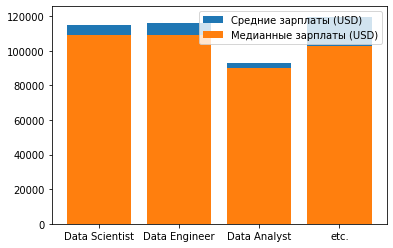

In [4]:
plt.bar(g, [ds["salary_in_usd"].mean(), de["salary_in_usd"].mean(), da["salary_in_usd"].mean(), etc["salary_in_usd"].mean()], label="Средние зарплаты (USD)")
plt.bar(g, [ds["salary_in_usd"].median(), de["salary_in_usd"].median(), da["salary_in_usd"].median(), etc["salary_in_usd"].median()], label="Медианные зарплаты (USD)")
plt.legend()
plt.show()

3.1. Какая самая высокооплачиваемая из групп вакансий, исходя из их средних зарплат?

In [ ]:
Самая высокооплачиваемая вакансия из рассматриваемых находится в группе etc.

### 4. Какая средняя и медианная зарплата по каждому региону?

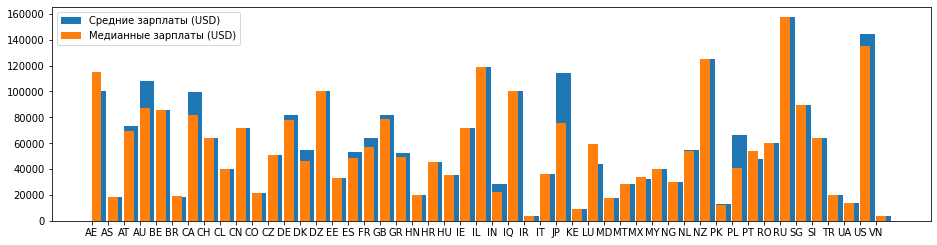

In [5]:
region_mean = df.groupby("company_location")["salary_in_usd"].mean()
region_median = df.groupby("company_location")["salary_in_usd"].median()

def cm_to_inch(value):
    return value/2.54

plt.figure(figsize=(cm_to_inch(40),cm_to_inch(10)))
plt.bar(region_mean.keys(), region_mean, label="Средние зарплаты (USD)", width=0.9, align='edge')
plt.bar(region_median.keys(), region_median, label="Медианные зарплаты (USD)", width=0.6, align='edge')
plt.legend()
plt.show()

### 5. Какое процентное соотношение каждого региона по вакансиям от всех вакансий?

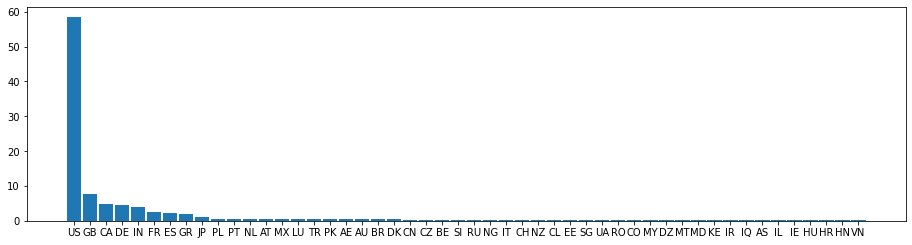

In [49]:
region_counts = (df.groupby("company_location")["salary_in_usd"].count() * 100 / df["salary_in_usd"].count()).reset_index(name='count') \
                             .sort_values(['count'], ascending=False)

plt.figure(figsize=(cm_to_inch(40),cm_to_inch(10)))
plt.bar(region_counts["company_location"], region_counts["count"], label="Процентное соотношение каждого региона по вакансиям", width=0.9, align='center')

plt.show()

### 6. Какая корреляция уровня опыта от зарплаты?

In [60]:
d_exp = {"EN": 0, "MI": 1, "SE": 2, "EX": 3}
df.replace(d_exp).corr().loc["experience_level", "salary_in_usd"]

0.48423288617306265

### 7. Сколько должностей в наборе данных? Какие 10 наиболее часто встречающихся должностей?

In [74]:
job_counts = df.groupby("job_title")["salary_in_usd"] \
               .count() \
               .reset_index(name='count') \
               .sort_values(['count'], ascending=False)

print("Всего должностей: ", job_counts["count"].sum())
print("10 наиболее часто встречающихся должностей: ")
job_counts.head(10)


Всего должностей:  607
10 наиболее часто встречающихся должностей: 


,job_title,count
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16
21,Data Science Manager,12
16,Data Architect,11
7,Big Data Engineer,8
41,Machine Learning Scientist,8
25,Director of Data Science,7
